In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from typing import Sequence

In [2]:
meta = yf.Ticker("META")
data = meta.history(period="max")

In [3]:
data[data["Dividends"] > 0]

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-02-21 00:00:00-05:00,463.755492,466.240784,459.073210,465.276489,12921800,0.500,0.0
2024-06-14 00:00:00-04:00,500.188912,504.666879,498.298221,501.691528,10243300,0.500,0.0
2024-09-16 00:00:00-04:00,522.469677,531.991942,515.357904,531.175232,9527600,0.500,0.0
2024-12-16 00:00:00-05:00,627.999718,629.166084,616.635589,622.277771,10885600,0.500,0.0
2025-03-14 00:00:00-04:00,601.439726,607.486048,593.437865,606.228882,12364500,0.525,0.0
2025-06-16 00:00:00-04:00,698.288822,706.097186,692.477480,701.074646,13720300,0.525,0.0
2025-09-22 00:00:00-04:00,781.212840,785.089683,763.846998,764.536438,11706900,0.525,0.0
2025-12-15 00:00:00-05:00,645.700012,653.000000,638.700012,647.510010,15549100,0.525,0.0


In [4]:
# Compensated for dividend
data["Close"] = data["Close"] - data["Dividends"]
data.drop(columns=["Dividends"])

,Open,High,Low,Close,Volume,Stock Splits
Date,,,,,,
2012-05-18 00:00:00-04:00,41.758311,44.687848,37.736405,37.964809,573576400,0.0
2012-05-21 00:00:00-04:00,36.276596,36.405695,32.771084,33.793938,168192700,0.0
2012-05-22 00:00:00-04:00,32.383788,33.356990,30.725373,30.784956,101786600,0.0
2012-05-23 00:00:00-04:00,31.152392,32.274552,31.142461,31.778021,73600000,0.0
2012-05-24 00:00:00-04:00,32.721430,32.979624,31.549615,32.800873,50237200,0.0
...,...,...,...,...,...,...
2025-12-19 00:00:00-05:00,666.419983,671.000000,658.179993,658.770020,49977100,0.0
2025-12-22 00:00:00-05:00,661.650024,673.580017,656.650024,661.500000,15659400,0.0
2025-12-23 00:00:00-05:00,660.049988,666.000000,658.250000,664.940002,8486800,0.0


In [5]:
np.sqrt(data["Close"].var())

np.float64(177.76934947569634)

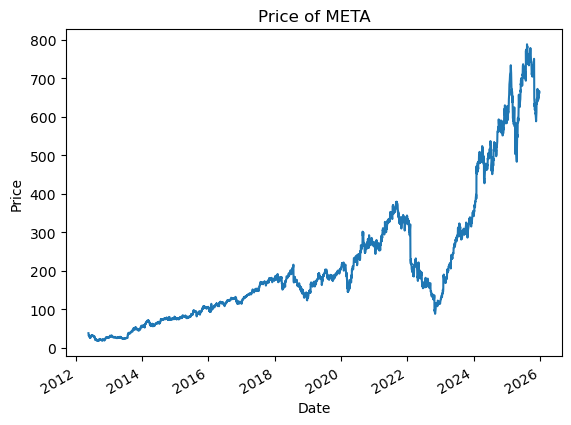

In [6]:
fig, ax = plt.subplots()
data["Close"].plot(ax=ax)
ax.set_ylabel("Price")

plt.title("Price of META")
plt.show()

In [58]:
limit = 4_000_000
values = np.zeros(shape=50, dtype='int64')
values[0], values[1] = 2, 8

In [59]:
for i in range(2, 50):
    values[i] = values[i - 1] + values[i - 2]
values

array([          2,           8,          10,          18,          28,
                46,          74,         120,         194,         314,
               508,         822,        1330,        2152,        3482,
              5634,        9116,       14750,       23866,       38616,
             62482,      101098,      163580,      264678,      428258,
            692936,     1121194,     1814130,     2935324,     4749454,
           7684778,    12434232,    20119010,    32553242,    52672252,
          85225494,   137897746,   223123240,   361020986,   584144226,
         945165212,  1529309438,  2474474650,  4003784088,  6478258738,
       10482042826, 16960301564, 27442344390, 44402645954, 71844990344])

In [64]:
def stock_gbm(initial_point: float,
              T: float, var: float,
              mean: float, delta_t:
              float = 1/356) -> Sequence[float]:
    n = int(T / delta_t)

    prices = np.zeros(shape=n+1)
    prices[0] = initial_point

    for i in range(1, n+1):
        normal = np.random.standard_normal()
        normal = mean * delta_t + np.sqrt(var * delta_t) * normal

        dS = prices[i-1] * normal
        prices[i] = prices[i-1] + dS

    return prices

In [65]:
S0 = 100.0          # initial price
T = 1.0             # 1 year
mu = 0.08           # 8% annual drift
sigma = 0.2         # 20% annual volatility
var = sigma**2
dt = 1/365.0

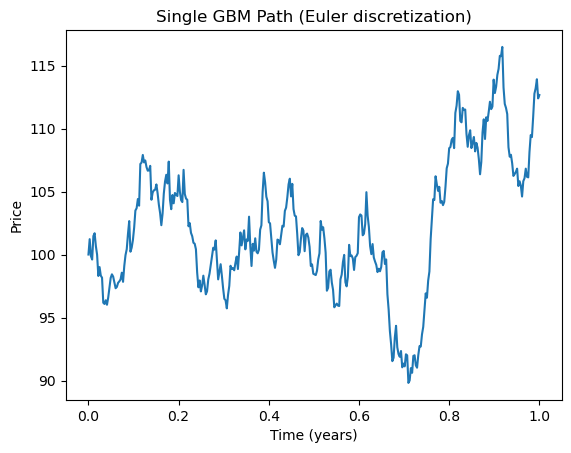

In [66]:
import numpy as np
import matplotlib.pyplot as plt

def plot_single_path():
    prices = stock_gbm(
        initial_point=100.0,
        T=1.0,
        var=0.2**2,
        mean=0.08,
        delta_t=1/365.0
    )

    t = np.linspace(0, 1.0, len(prices))

    plt.figure()
    plt.plot(t, prices)
    plt.xlabel("Time (years)")
    plt.ylabel("Price")
    plt.title("Single GBM Path (Euler discretization)")
    plt.show()

plot_single_path()

In [70]:
default_mu  = 0.0001
default_row  = 0.1
default_v  = 0.001
default_S0 = 10
default_h0 = 0

default_K = 100
default_n = 10
default_β = 0.95

In [116]:
n = 10
m = 10_000_000

paths = np.zeros(shape=(m, n))
paths[:, 0] = np.log(default_S0)

h = np.full(shape=m, fill_value=default_h0)

for t in range(1, n):
    paths[:, t] = paths[:, t - 1] + default_mu + np.exp(h) * np.random.standard_normal(m)
    h = default_row * h + default_v * np.random.standard_normal(m)

values = np.maximum(np.exp(paths[:, -1]) - default_K, 0)
average = np.sum(values) / m




In [117]:
average

np.float64(851.0264808210577)